In [176]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', family = 'Arial')

In [212]:
# read in results
path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\final_results.csv"
data = pd.read_csv(path)

## Make dataset for figure comparison here

In [213]:
def subsect(instrument, atmosphere):
    if instrument == "both":
        pass
    else: 
        data.drop(data[data.instrument != instrument].index, inplace = True)
    
    if atmosphere == "all":
        pass
    else:
        data.drop(data[data.atmosphere != atmosphere].index, inplace = True)

In [219]:
instrument = input("Instrument (LANL/ChemLIBS/both): ")
atmosphere = input("Atmosphere (Mars/Earth/Vacuum/all): ")
subsect(instrument, atmosphere)
display(data)

Instrument (LANL/ChemLIBS/both): LANL
Atmosphere (Mars/Earth/Vacuum/all): Mars


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,Li,LANL,Mars,6.919242,2.589635,13.880546,5.195013,42.062260,15.742465,69.722795,43.521475,10.084776,8.799955,0.961297,0.950622
1,MnO,LANL,Mars,0.040435,0.015134,0.081117,0.030359,0.245808,0.091998,0.380975,0.173929,0.193596,0.089310,0.692665,0.726536
2,Na2O,LANL,Mars,0.062748,0.023484,0.125877,0.047112,0.381447,0.142763,2.484661,2.338504,0.562673,0.546838,0.853445,0.870809
3,Ni,LANL,Mars,2.420871,0.906049,4.856458,1.817606,14.716538,5.507897,80.289477,78.720693,64.553660,63.749807,0.301079,0.308469
4,Pb,LANL,Mars,0.188856,0.070682,0.378860,0.141794,1.148061,0.429680,17.688094,17.644902,13.276562,13.257084,0.197811,0.198725
5,Rb,LANL,Mars,1.568396,0.586997,3.146326,1.177562,9.534321,3.568370,96.953839,95.114808,37.799037,37.455466,0.695980,0.703645
6,SiO2,LANL,Mars,2.291385,0.857587,4.596699,1.720387,13.929390,5.213294,57.568586,57.568586,2.608106,2.608106,0.954824,0.954824
7,Sr,LANL,Mars,56.714602,21.226335,113.773974,42.581706,344.769618,129.035473,465.315476,283.194613,57.648238,43.969318,0.761428,0.907275
8,Zn,LANL,Mars,1.617021,0.605196,3.243873,1.214071,9.829918,3.679002,88.750088,88.342504,51.210923,51.068805,0.311663,0.315859


#### Split between majors and minors

In [138]:
maj_list = ['MnO', 'Na2O', 'SiO2']
majors = data[data.element.isin(maj_list)].reset_index(drop=True)
minors = data[~data.element.isin(maj_list)].reset_index(drop=True)
display(majors)
display(minors)

,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,MnO,LANL,Mars,0.040435,0.015134,0.081117,0.030359,0.245808,0.091998,0.380975,0.173929,0.193596,0.089310,0.692665,0.726536
1,Na2O,LANL,Mars,0.062748,0.023484,0.125877,0.047112,0.381447,0.142763,2.484661,2.338504,0.562673,0.546838,0.853445,0.870809
2,SiO2,LANL,Mars,2.291385,0.857587,4.596699,1.720387,13.929390,5.213294,57.568586,57.568586,2.608106,2.608106,0.954824,0.954824


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,Li,LANL,Mars,6.919242,2.589635,13.880546,5.195013,42.062260,15.742465,69.722795,43.521475,10.084776,8.799955,0.961297,0.950622
1,Ni,LANL,Mars,2.420871,0.906049,4.856458,1.817606,14.716538,5.507897,80.289477,78.720693,64.553660,63.749807,0.301079,0.308469
2,Pb,LANL,Mars,0.188856,0.070682,0.378860,0.141794,1.148061,0.429680,17.688094,17.644902,13.276562,13.257084,0.197811,0.198725
3,Rb,LANL,Mars,1.568396,0.586997,3.146326,1.177562,9.534321,3.568370,96.953839,95.114808,37.799037,37.455466,0.695980,0.703645
4,Sr,LANL,Mars,56.714602,21.226335,113.773974,42.581706,344.769618,129.035473,465.315476,283.194613,57.648238,43.969318,0.761428,0.907275
5,Zn,LANL,Mars,1.617021,0.605196,3.243873,1.214071,9.829918,3.679002,88.750088,88.342504,51.210923,51.068805,0.311663,0.315859


## Compare between Braga and metal background methods

In [220]:
# make plotting function
def braga_metals(lotype):
    #define variables
    braga = lotype + '_Braga'
    metals = lotype + '_metals'
    params = instrument + "_" + atmosphere + "_" + lotype
    
    # define plot stuff
    width = 0.2
    c1 = 'navy'
    c2 = 'goldenrod'
    ysize = 12
    lsize = 14
    tsize = 16
    
    #labels
    majlab = avg_maj.index
    minlab = avg_minor.index
    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,5),
                                     # make LOD one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    maj1 = maj.bar(majt1, majors[braga], width, label = "Braga", color = c1)
    maj2 = maj.bar(majt2, majors[metals], width, label = "metals", color = c2)
    # minors
    min1 = minor.bar(mint1, minors[braga], width, label = "Braga", color = c1)
    min2 = minor.bar(mint2, minors[metals], width, label = "metals", color = c2)
    
    # formatting
    if lotype == 'R2':
        maj.set_ylabel(lotype, fontsize = tsize)
        plt.subplots_adjust(wspace = 0, hspace =0)
        minor.yaxis.set_ticklabels([])
    else: 
        maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)
        minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
        minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
   
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.legend(handles = [maj1, maj2], fontsize = lsize)
    
    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.eps'
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


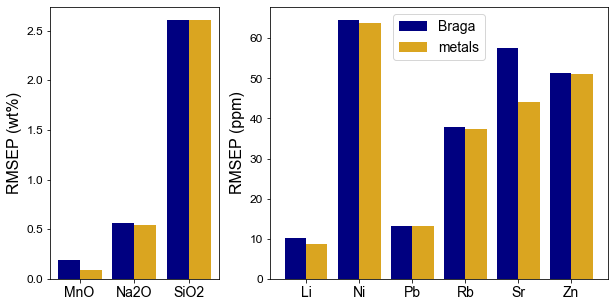

In [221]:
braga_metals("RMSEP")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


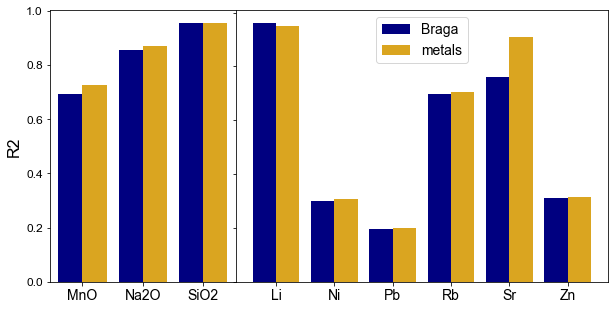

In [222]:
braga_metals("R2")